# 10minutes to pandas

#### This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the Cookbook.

#### Customarily, we import as follows:

In [1]:
import numpy as np

In [2]:
import pandas as pd

## Object creation

See the Data Structure Intro section.

Creating a Series by passing a list of values, letting pandas create a default integer index:

In [3]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [4]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:

In [6]:
dates = pd.date_range('20130101', periods = 6)

In [7]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [9]:
df = pd.DataFrame(np.random.randn(6, 4), index = dates, columns = list('ABCD'))

In [10]:
df

,A,B,C,D
2013-01-01,-0.722553,0.515933,0.159861,-0.970057
2013-01-02,-0.181979,-0.033110,0.296282,0.657766
2013-01-03,0.618408,1.085369,-0.262134,-0.988555
2013-01-04,0.302999,-0.748060,1.116090,-0.024664
2013-01-05,-0.030582,-0.971433,1.370316,1.238355
2013-01-06,0.949572,-0.285368,1.016627,-0.409935


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [12]:
df2 = pd.DataFrame({'A' : 1.,
                   'B' : pd.Timestamp('20130102'),
                   'C' : pd.Series(1, index = list(range(4)), dtype = 'float32'),
                   'D' : np.array([3] * 4, dtype = 'int32'),
                   'E' : pd.Categorical(["test", "train", "test", "train"]),
                   'F' : 'foo'})

In [13]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The columns of the resulting DataFrame have different dtypes.

In [15]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

 If you're using IPython, tab completion for column names (as well as public attributes) is automatically enabled.

In [ ]:
df2.<TAB> #실행하면 컬럼이름들도 들어있습니다.

As you can see, the coulmns A, B, C, and D are automatically tab completed. E is there as well; the rest of the attributes have been truncated for brevity.

## Viewing data

see the Basics section.

Here is how to view top and bottom rows of the frame:

In [18]:
df.head()

,A,B,C,D
2013-01-01,-0.722553,0.515933,0.159861,-0.970057
2013-01-02,-0.181979,-0.033110,0.296282,0.657766
2013-01-03,0.618408,1.085369,-0.262134,-0.988555
2013-01-04,0.302999,-0.748060,1.116090,-0.024664
2013-01-05,-0.030582,-0.971433,1.370316,1.238355


In [19]:
df.tail()

,A,B,C,D
2013-01-02,-0.181979,-0.033110,0.296282,0.657766
2013-01-03,0.618408,1.085369,-0.262134,-0.988555
2013-01-04,0.302999,-0.748060,1.116090,-0.024664
2013-01-05,-0.030582,-0.971433,1.370316,1.238355
2013-01-06,0.949572,-0.285368,1.016627,-0.409935


In [20]:
df.tail(3)

,A,B,C,D
2013-01-04,0.302999,-0.748060,1.116090,-0.024664
2013-01-05,-0.030582,-0.971433,1.370316,1.238355
2013-01-06,0.949572,-0.285368,1.016627,-0.409935


Display the index, columns:

In [22]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [23]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

DataFrame.to_numpy() gives a NumPy representation of the underlying data. Note that this can be an expensive operation when your DataFrame has columns with different data types, which comes down to a fundamental difference between pandas and NumPy: _*NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column.*_ When you call DataFrame.to_numpy(), pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being object, which requires casting every value to a Python object.

For df, our DataFrame of all floating-point values, DataFrame.to_numpy() is fast and doesn't require copying data.

In [24]:
df.to_numpy()

array([[-0.722553  ,  0.51593283,  0.15986123, -0.97005686],
       [-0.18197854, -0.03310995,  0.29628209,  0.6577657 ],
       [ 0.61840758,  1.08536942, -0.26213392, -0.98855467],
       [ 0.30299899, -0.74806023,  1.11609034, -0.02466364],
       [-0.03058173, -0.97143331,  1.37031591,  1.23835475],
       [ 0.94957198, -0.28536846,  1.01662694, -0.40993524]])

For df2, the DataFrame with multiple dtypes, DataFrame.to_numpy() is relatives expensive.

In [26]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

### NOTE
DataFrame.to_numpy() does not include the index or column labels in the output.

describe() shows a quick statistic summary of your data:

In [28]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.155978,-0.072778,0.616174,-0.082848
std,0.597676,0.774370,0.642026,0.895757
min,-0.722553,-0.971433,-0.262134,-0.988555
25%,-0.144129,-0.632387,0.193966,-0.830026
50%,0.136209,-0.159239,0.656455,-0.217299
75%,0.539555,0.378672,1.091224,0.487158
max,0.949572,1.085369,1.370316,1.238355


Transposing your data:

In [30]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.722553,-0.181979,0.618408,0.302999,-0.030582,0.949572
B,0.515933,-0.033110,1.085369,-0.748060,-0.971433,-0.285368
C,0.159861,0.296282,-0.262134,1.116090,1.370316,1.016627
D,-0.970057,0.657766,-0.988555,-0.024664,1.238355,-0.409935


Sorting by an axis:

In [31]:
df.sort_index(axis = 1, ascending = False)

,D,C,B,A
2013-01-01,-0.970057,0.159861,0.515933,-0.722553
2013-01-02,0.657766,0.296282,-0.033110,-0.181979
2013-01-03,-0.988555,-0.262134,1.085369,0.618408
2013-01-04,-0.024664,1.116090,-0.748060,0.302999
2013-01-05,1.238355,1.370316,-0.971433,-0.030582
2013-01-06,-0.409935,1.016627,-0.285368,0.949572


Sorting by values:

In [32]:
df.sort_values(by = 'B')

,A,B,C,D
2013-01-05,-0.030582,-0.971433,1.370316,1.238355
2013-01-04,0.302999,-0.748060,1.116090,-0.024664
2013-01-06,0.949572,-0.285368,1.016627,-0.409935
2013-01-02,-0.181979,-0.033110,0.296282,0.657766
2013-01-01,-0.722553,0.515933,0.159861,-0.970057
2013-01-03,0.618408,1.085369,-0.262134,-0.988555


## Selection

### NOTE
While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive wor, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc and .iloc.

See the indexing documentation Indexing and Selecting Data and MultiIndex / Advanced Indexing.

## Getting

selecting a single column, which yields a Series, equivalent to df.A:

In [33]:
df['A']

2013-01-01   -0.722553
2013-01-02   -0.181979
2013-01-03    0.618408
2013-01-04    0.302999
2013-01-05   -0.030582
2013-01-06    0.949572
Freq: D, Name: A, dtype: float64

selecting via [], which slices the rows.

In [34]:
df[0:3]

,A,B,C,D
2013-01-01,-0.722553,0.515933,0.159861,-0.970057
2013-01-02,-0.181979,-0.033110,0.296282,0.657766
2013-01-03,0.618408,1.085369,-0.262134,-0.988555


In [35]:
df['20130103' : '20130104']

,A,B,C,D
2013-01-03,0.618408,1.085369,-0.262134,-0.988555
2013-01-04,0.302999,-0.748060,1.116090,-0.024664


## Selection by label

See more in Selection by Label.

For getting a cross section using a label:

In [36]:
df.loc[dates[0]]

A   -0.722553
B    0.515933
C    0.159861
D   -0.970057
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label:

In [37]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,-0.722553,0.515933
2013-01-02,-0.181979,-0.033110
2013-01-03,0.618408,1.085369
2013-01-04,0.302999,-0.748060
2013-01-05,-0.030582,-0.971433
2013-01-06,0.949572,-0.285368


Showing label slicing, both endpoints are included:

In [38]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,-0.181979,-0.033110
2013-01-03,0.618408,1.085369
2013-01-04,0.302999,-0.748060


Reduction in the dimensions of the returned object:

In [39]:
df.loc['20130102', ['A', 'B']]

A   -0.181979
B   -0.033110
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value:

In [40]:
df.loc[dates[0], 'A']

-0.7225529976629858

For getting fast access to a scalar (equivalent to the prior method):

In [41]:
df.at[dates[0], 'A']

-0.7225529976629858

## Selection by position
See more in Selection by Position.

Select via the position of the passed integers:

In [42]:
df.iloc[3]

A    0.302999
B   -0.748060
C    1.116090
D   -0.024664
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy / python:

In [43]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.302999,-0.748060
2013-01-05,-0.030582,-0.971433


By lists of integer position locations, similar to the numpy / python style:

In [44]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-0.181979,0.296282
2013-01-03,0.618408,-0.262134
2013-01-05,-0.030582,1.370316


For slicing rows explicitly:

In [45]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.181979,-0.033110,0.296282,0.657766
2013-01-03,0.618408,1.085369,-0.262134,-0.988555


For slicing columns explicitly:

In [46]:
df.iloc[:, 1:3]

,B,C
2013-01-01,0.515933,0.159861
2013-01-02,-0.033110,0.296282
2013-01-03,1.085369,-0.262134
2013-01-04,-0.748060,1.116090
2013-01-05,-0.971433,1.370316
2013-01-06,-0.285368,1.016627


For getting a value explicitly:

In [47]:
df.iloc[1, 1]

-0.03310995318383153

For getting fast access to a scalar (equivalent to the prior method):

In [48]:
df.iat[1, 1]

-0.03310995318383153

## Boolean indexing

Using a single column's values to select data.

In [49]:
df[df['A'] > 0] # A column 값이 0보다 큰값에 해당할때, 각 데이터들을 모두 불러와라

,A,B,C,D
2013-01-03,0.618408,1.085369,-0.262134,-0.988555
2013-01-04,0.302999,-0.748060,1.116090,-0.024664
2013-01-06,0.949572,-0.285368,1.016627,-0.409935


Selecting values from a DataFrame where a boolean condition is met.

In [50]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,0.515933,0.159861,NaN
2013-01-02,NaN,NaN,0.296282,0.657766
2013-01-03,0.618408,1.085369,NaN,NaN
2013-01-04,0.302999,NaN,1.116090,NaN
2013-01-05,NaN,NaN,1.370316,1.238355
2013-01-06,0.949572,NaN,1.016627,NaN


Using the isin() method for filtering:

In [51]:
df2 = df.copy()

In [52]:
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']

In [53]:
df2

,A,B,C,D,E
2013-01-01,-0.722553,0.515933,0.159861,-0.970057,one
2013-01-02,-0.181979,-0.033110,0.296282,0.657766,one
2013-01-03,0.618408,1.085369,-0.262134,-0.988555,two
2013-01-04,0.302999,-0.748060,1.116090,-0.024664,three
2013-01-05,-0.030582,-0.971433,1.370316,1.238355,four
2013-01-06,0.949572,-0.285368,1.016627,-0.409935,three


In [54]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,0.618408,1.085369,-0.262134,-0.988555,two
2013-01-05,-0.030582,-0.971433,1.370316,1.238355,four


## Setting

Setting a new column automatically aligns the data by the indexes.

In [55]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index = pd.date_range('20130102', periods = 6))

In [56]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [57]:
df['F'] = s1

Setting values by label:

In [58]:
df.at[dates[0], 'A'] = 0

Setting values by position:

In [59]:
df.iat[0, 1] = 0

Setting by assigning with a NumPy array:

In [60]:
df.loc[:, 'D'] = np.array([5] * len(df))

The result of the prior setting operations.

In [61]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.159861,5,NaN
2013-01-02,-0.181979,-0.033110,0.296282,5,1.0
2013-01-03,0.618408,1.085369,-0.262134,5,2.0
2013-01-04,0.302999,-0.748060,1.116090,5,3.0
2013-01-05,-0.030582,-0.971433,1.370316,5,4.0
2013-01-06,0.949572,-0.285368,1.016627,5,5.0


A where operation with setting.

In [62]:
df2 = df.copy()

In [63]:
df2[df2 > 0] = -df2

In [64]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.159861,-5,NaN
2013-01-02,-0.181979,-0.033110,-0.296282,-5,-1.0
2013-01-03,-0.618408,-1.085369,-0.262134,-5,-2.0
2013-01-04,-0.302999,-0.748060,-1.116090,-5,-3.0
2013-01-05,-0.030582,-0.971433,-1.370316,-5,-4.0
2013-01-06,-0.949572,-0.285368,-1.016627,-5,-5.0


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section.

Reindexing allows you to change/ add/ delete the index on a specified axis. This returns a copy of the data.

In [65]:
df1 = df.reindex(index = dates[0:4], columns = list(df.columns) + ['E'])

In [66]:
df1.loc[dates[0]:dates[1], 'E'] = 1

In [67]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.159861,5,NaN,1.0
2013-01-02,-0.181979,-0.033110,0.296282,5,1.0,1.0
2013-01-03,0.618408,1.085369,-0.262134,5,2.0,NaN
2013-01-04,0.302999,-0.748060,1.116090,5,3.0,NaN


To drop any rows that have missing data.

In [68]:
df1.dropna(how = 'any')

,A,B,C,D,F,E
2013-01-02,-0.181979,-0.03311,0.296282,5,1.0,1.0


Filling missing data.

In [69]:
df1.fillna(value = 5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.159861,5,5.0,1.0
2013-01-02,-0.181979,-0.033110,0.296282,5,1.0,1.0
2013-01-03,0.618408,1.085369,-0.262134,5,2.0,5.0
2013-01-04,0.302999,-0.748060,1.116090,5,3.0,5.0


To get the boolean mask where valaues are nan.

In [70]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations
See the Basic section on Binary Ops.


## Stats
Operations in general exclude missing data.

Performing a descriptive statistic:

In [71]:
df.mean()

A    0.276403
B   -0.158767
C    0.616174
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis:

In [72]:
df.mean(1)

2013-01-01    1.289965
2013-01-02    1.216239
2013-01-03    1.688329
2013-01-04    1.734206
2013-01-05    1.873660
2013-01-06    2.336166
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [73]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index = dates).shift(2)

In [74]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [75]:
df.sub(s, axis = 'index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.381592,0.085369,-1.262134,4.0,1.0
2013-01-04,-2.697001,-3.748060,-1.883910,2.0,0.0
2013-01-05,-5.030582,-5.971433,-3.629684,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


## Apply
Applying functions to the data:

In [76]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.159861,5,NaN
2013-01-02,-0.181979,-0.033110,0.456143,10,1.0
2013-01-03,0.436429,1.052259,0.194009,15,3.0
2013-01-04,0.739428,0.304199,1.310100,20,6.0
2013-01-05,0.708846,-0.667234,2.680416,25,10.0
2013-01-06,1.658418,-0.952603,3.697043,30,15.0


In [77]:
df.apply(lambda x: x.max() - x.min())

A    1.131551
B    2.056803
C    1.632450
D    0.000000
F    4.000000
dtype: float64

## Histogramming
See more at Histogramming and Discretization.

In [78]:
s = pd.Series(np.random.randint(0, 7, size = 10))

In [79]:
s

0    5
1    2
2    1
3    0
4    3
5    1
6    0
7    6
8    2
9    3
dtype: int32

In [80]:
s.value_counts()

3    2
2    2
1    2
0    2
6    1
5    1
dtype: int64

## String Methods
Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each elemnet of the array, as in the code snippet below. Note that pattern-matching in str generally use regular expressions by default (and in some cases always uses them). See more at Vectorized String Methods.

In [82]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [83]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

## Concat
Pandas provides various facilities for easily combining together Series and Data Frame objects with various kinds fo set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the Merging section.

Concatenating pandas objects together with concat()

In [84]:
df = pd.DataFrame(np.random.randn(10, 4))

In [85]:
df

,0,1,2,3
0,1.776530,-0.221467,-1.449349,-0.997020
1,-0.500840,0.525222,1.068619,-0.190298
2,1.655834,0.460281,0.335679,-0.781884
3,-1.937147,1.242158,0.976759,-0.860270
4,-0.940637,-0.798757,-0.144913,-1.292886
5,-1.279085,-0.263504,-0.354326,-1.563621
6,-1.500029,-0.331965,-0.724233,-1.420883
7,-0.152521,-1.657349,-0.482912,0.336640
8,-0.797320,0.578559,-0.710591,-0.113909
9,0.522659,1.184601,0.898501,0.863502


In [86]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

In [87]:
pd.concat(pieces)

,0,1,2,3
0,1.776530,-0.221467,-1.449349,-0.997020
1,-0.500840,0.525222,1.068619,-0.190298
2,1.655834,0.460281,0.335679,-0.781884
3,-1.937147,1.242158,0.976759,-0.860270
4,-0.940637,-0.798757,-0.144913,-1.292886
5,-1.279085,-0.263504,-0.354326,-1.563621
6,-1.500029,-0.331965,-0.724233,-1.420883
7,-0.152521,-1.657349,-0.482912,0.336640
8,-0.797320,0.578559,-0.710591,-0.113909
9,0.522659,1.184601,0.898501,0.863502


### NOTE
Adding a column to a DataFrame is relatively fast. However, adding a new requires a copy, and may be expensive. We recommend passing a pre-built list of records to the DataFrame constructor instead of building a DataFrame by iteratively appending records to it. See Appending to dataframe for more.

## Join
SQL style merges. SEE the Database style joining section.

In [88]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [89]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [90]:
left

,key,lval
0,foo,1
1,foo,2


In [91]:
right

,key,rval
0,foo,4
1,foo,5


In [92]:
pd.merge(left, right, on = 'key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


## Grouping
By "group by" we are referring to a process involving one or more of the following steps:

    - Splitting the data into groups based on some criteria
    
    - Applying a function to each group independently
    
    - Combining the results into a data structure
 
See the Grouping section.

In [93]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})

In [94]:
df

,A,B,C,D
0,foo,one,-1.727974,0.444954
1,bar,one,0.996701,-0.559694
2,foo,two,-0.569886,-0.766348
3,bar,three,1.245667,-0.294018
4,foo,two,-1.511035,-0.382531
5,bar,two,-0.729016,0.642288
6,foo,one,-0.086444,-0.305849
7,foo,three,-0.304947,-0.370179


Grouping and then applying the sum() function to the resulting groups.

In [95]:
df.groupby('A').sum()

,C,D
A,,
bar,1.513351,-0.211424
foo,-4.200287,-1.379954


Grouping by multiple columns forms a hierarchial index, and again we can apply the sum function.

In [98]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.996701 -0.559694
    three  1.245667 -0.294018
    two   -0.729016  0.642288
foo one   -1.814418  0.139104
    three -0.304947 -0.370179
    two   -2.080921 -1.148879

## Reshaping
See the sections on Hierarchical Indexing and Reshaping.

## Stack

In [100]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                   'one', 'two', 'one', 'two']]))

In [102]:
index = pd.MultiIndex.from_tuples(tuples, names = ['first', 'second'])

In [103]:
df = pd.DataFrame(np.random.randn(8, 2), index = index, columns = ['A', 'B'])

In [104]:
df2 = df[:4]

In [105]:
df2

A         B
first second                    
bar   one     0.894275 -0.188465
      two     0.322693  0.599488
baz   one    -0.902762 -1.211102
      two     0.589233  1.519123

The stack() method "compresses" a level in the DataFrame's columns.

In [106]:
stacked = df2.stack()

In [107]:
stacked

first  second   
bar    one     A    0.894275
               B   -0.188465
       two     A    0.322693
               B    0.599488
baz    one     A   -0.902762
               B   -1.211102
       two     A    0.589233
               B    1.519123
dtype: float64

With a "stacked" DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level:

In [108]:
stacked.unstack()

A         B
first second                    
bar   one     0.894275 -0.188465
      two     0.322693  0.599488
baz   one    -0.902762 -1.211102
      two     0.589233  1.519123

In [109]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.894275  0.322693
      B -0.188465  0.599488
baz   A -0.902762  0.589233
      B -1.211102  1.519123

In [111]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.894275 -0.902762
       B -0.188465 -1.211102
two    A  0.322693  0.589233
       B  0.599488  1.519123

## Pivot tables
See the section on Pivot Tables.

In [112]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})

In [113]:
df

,A,B,C,D,E
0,one,A,foo,-0.134635,0.240698
1,one,B,foo,-0.081744,-1.315081
2,two,C,foo,0.548780,-1.624497
3,three,A,bar,0.961983,-0.165698
4,one,B,bar,-0.503597,-0.549035
5,one,C,bar,0.938887,1.296411
6,two,A,foo,0.003285,-0.121775
7,three,B,foo,-0.892592,1.393640
8,one,C,foo,1.040011,-0.492373
9,one,A,bar,0.463474,1.658253


We can producce pivot tables from this data very easily:

In [114]:
pd.pivot_table(df, values = 'D', index = ['A', 'B'], columns = ['C'])

C             bar       foo
A     B                    
one   A  0.463474 -0.134635
      B -0.503597 -0.081744
      C  0.938887  1.040011
three A  0.961983       NaN
      B       NaN -0.892592
      C  1.202231       NaN
two   A       NaN  0.003285
      B -0.915021       NaN
      C       NaN  0.548780

## Time series
pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extemely common in, but not limited to, financial applications. See the Time Series section.

In [115]:
rng = pd.date_range('1/1/2012', periods = 100, freq = 'S')

In [116]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index = rng)

In [117]:
ts.resample('5min').sum()

2012-01-01    25276
Freq: 5T, dtype: int32

Time zone representation:

In [118]:
rng = pd.date_range('3/6/2012 00:00', periods = 5, freq = 'D')

In [119]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [120]:
ts

2012-03-06   -1.661380
2012-03-07    0.525589
2012-03-08   -0.503540
2012-03-09    1.689259
2012-03-10    0.768327
Freq: D, dtype: float64

In [121]:
ts_utc = ts.tz_localize('UTC')

In [122]:
ts_utc

2012-03-06 00:00:00+00:00   -1.661380
2012-03-07 00:00:00+00:00    0.525589
2012-03-08 00:00:00+00:00   -0.503540
2012-03-09 00:00:00+00:00    1.689259
2012-03-10 00:00:00+00:00    0.768327
Freq: D, dtype: float64

Converting to another time zone:

In [123]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -1.661380
2012-03-06 19:00:00-05:00    0.525589
2012-03-07 19:00:00-05:00   -0.503540
2012-03-08 19:00:00-05:00    1.689259
2012-03-09 19:00:00-05:00    0.768327
Freq: D, dtype: float64

Converting between time span representations:

In [126]:
rng = pd.date_range('1/1/2012', periods = 5, freq = 'M')

In [127]:
ts = pd.Series(np.random.randn(len(rng)), index = rng)

In [128]:
ts

2012-01-31    1.611852
2012-02-29    1.259461
2012-03-31    0.515606
2012-04-30   -1.181826
2012-05-31   -1.394598
Freq: M, dtype: float64

In [129]:
ps = ts.to_period()

In [130]:
ps

2012-01    1.611852
2012-02    1.259461
2012-03    0.515606
2012-04   -1.181826
2012-05   -1.394598
Freq: M, dtype: float64

In [131]:
ps.to_timestamp()

2012-01-01    1.611852
2012-02-01    1.259461
2012-03-01    0.515606
2012-04-01   -1.181826
2012-05-01   -1.394598
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [132]:
prng = pd.period_range('1990Q1', '2000Q4', freq = 'Q-NOV')

In [133]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [134]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [135]:
ts.head()

1990-03-01 09:00    0.524193
1990-06-01 09:00    0.141027
1990-09-01 09:00    0.260060
1990-12-01 09:00    0.177599
1991-03-01 09:00    1.375533
Freq: H, dtype: float64

## Categoricals
pandas can include categorical data in a DataFrame. For full docs, see the categorical introduction and the API documentation.

In [136]:
df = pd.DataFrame({"id" : [1, 2, 3, 4, 5, 6],
                  "raw_grade" : ['a', 'b', 'b', 'a', 'a', 'e']})

Convert the raw grades to a categorical data type.

In [137]:
df["grade"] = df["raw_grade"].astype("category")

In [138]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!).

In [139]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series.cat return a new Series by default).

In [140]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [141]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

Sorting is per order in the categories, not lexical order.

In [142]:
df.sort_values(by = "grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column also shows empty categories.

In [143]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting
See the Plotting docs.

We use the standard convention for referencing the matplotlib API:

In [144]:
import matplotlib.pyplot as plt

In [145]:
plt.close('all')

In [146]:
ts = pd.Series(np.random.randn(1000),
              index = pd.date_range('1/1/2000', periods = 1000))

In [147]:
ts = ts.cumsum()

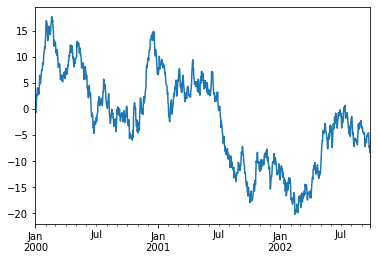

In [148]:
ts.plot()

On a DataFrame, the plot() method is a convenience to plot all of the columns with labels:

In [150]:
df = pd.DataFrame(np.random.randn(1000, 4), index = ts.index,
                 columns = ['A', 'B', 'C', 'D'])

In [151]:
df = df.cumsum()

In [152]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

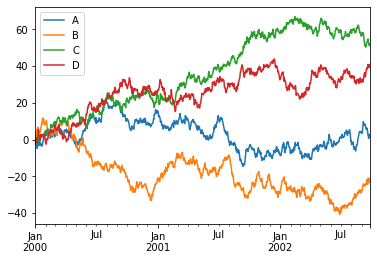

In [153]:
df.plot()

No handles with labels found to put in legend.


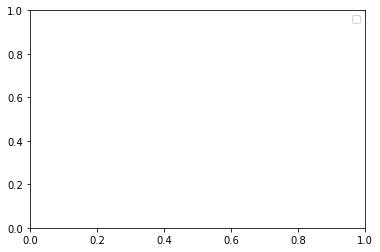

In [154]:
plt.legend(loc='best')

## GETTING DATA IN/OUT

## CSV
writing to a csv file.

In [155]:
df.to_csv('foo.csv')

In [156]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.285159,1.200749,-2.178736,-2.545742
1,2000-01-02,-1.788789,1.111820,-2.140304,-1.120709
2,2000-01-03,-2.598482,1.292946,-2.217236,-0.458204
3,2000-01-04,-2.188795,2.811462,-1.134056,0.617996
4,2000-01-05,-2.715536,4.018034,0.446164,-1.788861
...,...,...,...,...,...
995,2002-09-22,0.601514,-21.919145,52.439858,39.581722
996,2002-09-23,2.618242,-21.839353,51.310276,40.558121
997,2002-09-24,1.975682,-21.686242,51.317898,40.739091
998,2002-09-25,2.391181,-23.392574,51.043631,39.296405


## HDF5
Reading and writing to HDFStores.

Writing to a HDF5 Store.

In [157]:
df.to_hdf('foo.h5', 'df')

Reading from a HDF5 Store.

In [159]:
pd.read_hdf('foo.h5', 'df')

,A,B,C,D
2000-01-01,-0.285159,1.200749,-2.178736,-2.545742
2000-01-02,-1.788789,1.111820,-2.140304,-1.120709
2000-01-03,-2.598482,1.292946,-2.217236,-0.458204
2000-01-04,-2.188795,2.811462,-1.134056,0.617996
2000-01-05,-2.715536,4.018034,0.446164,-1.788861
...,...,...,...,...
2002-09-22,0.601514,-21.919145,52.439858,39.581722
2002-09-23,2.618242,-21.839353,51.310276,40.558121
2002-09-24,1.975682,-21.686242,51.317898,40.739091
2002-09-25,2.391181,-23.392574,51.043631,39.296405


## Excel
Reading and writing to MS Excel.

Writing to an excel file.

In [160]:
df.to_excel('foo.xlsx', sheet_name = 'Sheet1')

Reading from an excle file.

In [162]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col = None, na_values = ['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.285159,1.200749,-2.178736,-2.545742
1,2000-01-02,-1.788789,1.111820,-2.140304,-1.120709
2,2000-01-03,-2.598482,1.292946,-2.217236,-0.458204
3,2000-01-04,-2.188795,2.811462,-1.134056,0.617996
4,2000-01-05,-2.715536,4.018034,0.446164,-1.788861
...,...,...,...,...,...
995,2002-09-22,0.601514,-21.919145,52.439858,39.581722
996,2002-09-23,2.618242,-21.839353,51.310276,40.558121
997,2002-09-24,1.975682,-21.686242,51.317898,40.739091
998,2002-09-25,2.391181,-23.392574,51.043631,39.296405


## GOTCHAS
if you are attempting to perform an operation you might see an exception like:

In [165]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

See Comparisons for an explanation and what to do.

See Gotchas as well.